# Projeto de Análise de Dados - Tendências do youtube(CRISP-DM)

**Aluno(a):** Leandro Pereira da Silva Filho

**Metodologia:** CRISP-DM
(Fases 1 até 4)

## Fase 1 : Entendimento do Negócio

O objetivo deste projeto é analisar um dataset de vídeos do Youtube para identificar os principais fatores que contribuem para a popularidade e o engajamento, com o fim de fornecer insights para criadores de conteúdo.

In [2]:

#------- Importações e carregamento dos dados ------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import zipfile
import os 

# Define um estilo visual para os gráficos

sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(12, 7)


# Carregamento 

print("Carregando os dados...")
#A função agora retorna o caminho da PASTA com os dados já extraídos, então se faz desnecessario um processo anterior (Deixarei para fins didaticos de estudos futuros)
path = kagglehub.dataset_download("cyberevil545/youtube-videos-data-for-ml-and-trend-analysis")

#----------Rasura--------
#with zipfile.ZipFile(path, 'r' ) as zip_ref:
 #  zip_ref.extractall("temp_data")
  # for file in os.listdir("temp_data"):
   #  if file.endswith(".csv"):
    #    csv_path = os.path.join("temp_data",file)
     #   break
#--------- End rasura ----

#Vamos procurar o arquivo .CSV diretamente dentro desta pasta 
csv_path =""
for file in os.listdir(path):
    if file.endswith(".csv"):
        #Achamos, então montamos o caminho completo para o arquivo
        csv_path= os.path.join(path, file)
        break

print(f"Dataset encontrato em: {csv_path}") 

#carregar os dados para um dataframe do pandas
df = pd.read_csv(csv_path)
print("Dados carregados com sucesso na tabela 'df'!")




c:\Users\leand\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Carregando os dados...
Dataset encontrato em: C:\Users\leand\.cache\kagglehub\datasets\cyberevil545\youtube-videos-data-for-ml-and-trend-analysis\versions\1\youtube_data.csv
Dados carregados com sucesso na tabela 'df'!


## Fase 2: Entendimento dos Dados
Vamos fazer uma exploração inicial para entender a estrutura
e a qualidade dos dados.

In [6]:
# Visualizar as 5 primeiras linhas df.head()
df.head()

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0


In [7]:
#Obter informações técnicas(tipos de dados, contagem de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

## Fase 3 : Preparação dos Dados 
com base na exploraçãp,vamos limpar e enriquecer os dados.

In [11]:
#errata: Tentei colocar uma coluna de data, visando descobrir alguam relação por exemplo sobre postar vídeos no final de semana ter resultados melhores.

# 1) Converter a coluna de data para o formato datetime
#df['published_at']= pd.to_datetime(df['published_at'])

# 2) Remover linhas com dados essenciais faltando
df.dropna(subset=['views','likes','category'],inplace=True)

# 3) Engenharia de Features: Criar coluna com o dia da semana[ Removido não temos os dados para isso]
#df['publish_day_of_week']= df['published_at'].dt.day_name()

print("Dados limpos e preparados!")
df.info() # Verificar os tipos de dados novamente

Dados limpos e preparados!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments     

## Fase 4 : Análise e Visualização
Agora, vamos criar gráficos para responder às nossas perguntas de negócio

C:\Users\leand\AppData\Local\Temp\ipykernel_10700\2357247595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_canais.values, y=top_canais.index, palette= 'viridis')
c:\Users\leand\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10048 (\N{WHITE FLORETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


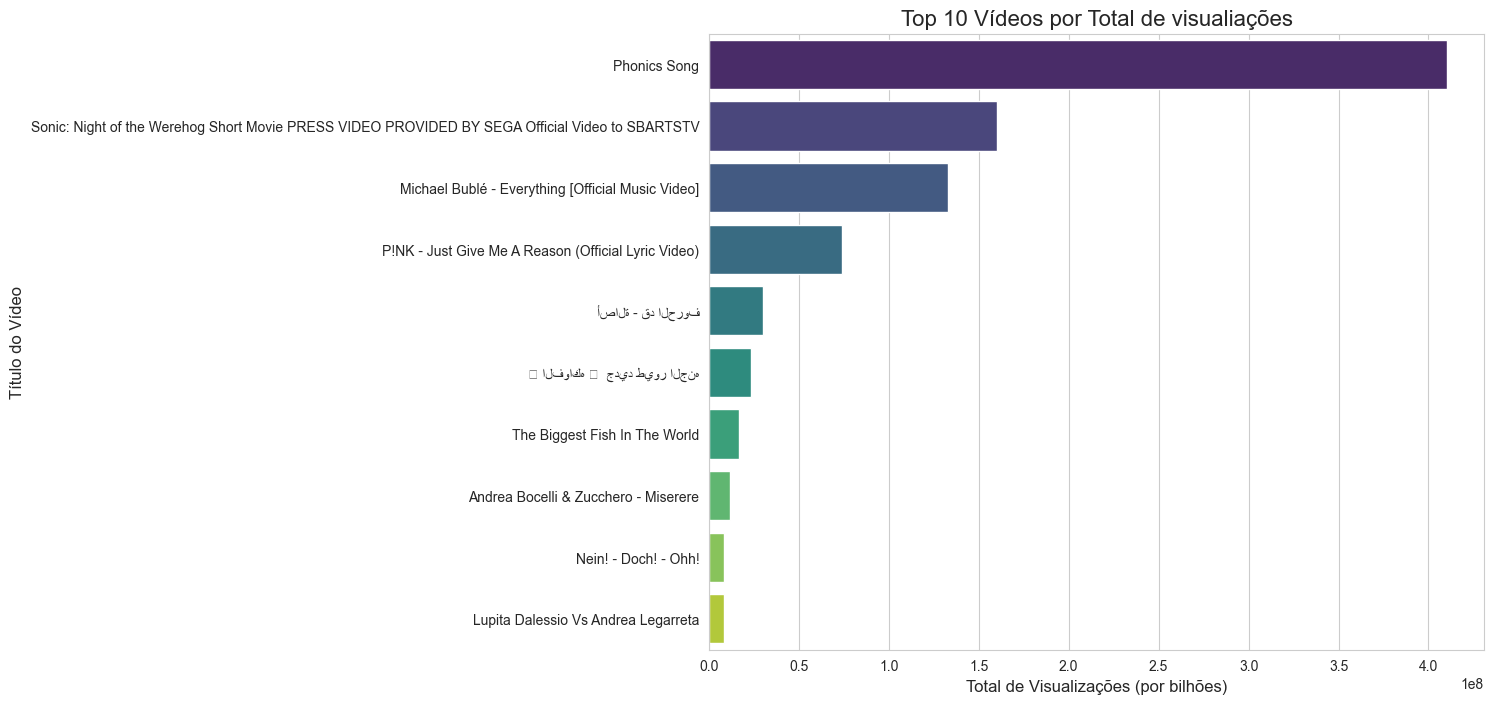

In [15]:
# GRÁFICO 1: Quais são so canais com mais visualizações?
plt.figure(figsize=(10, 8)) #Tamanho específico para este gráfico
top_canais = df.groupby('title')['views'].sum().nlargest(10)
sns.barplot(x=top_canais.values, y=top_canais.index, palette= 'viridis')
plt.title('Top 10 Vídeos por Total de visualiações', fontsize=16)
plt.xlabel('Total de Visualizações (por bilhões)',fontsize=12)
plt.ylabel('Título do Vídeo',fontsize=12)
plt.show()

#errtas: Foi necessario alterar ChannelName para title, o dataset não possui o nome dos canais.

In [19]:
# COMANDO DE VERIFICAÇÃO FINAL
print("As colunas exatas no seu DataFrame são:")
print(df.columns)

As colunas exatas no seu DataFrame são:
Index(['video_id', 'duration', 'bitrate', 'bitrate(video)', 'height', 'width',
       'frame rate', 'frame rate(est.)', 'codec', 'category', 'url', 'title',
       'description', 'hashtags', 'views', 'likes', 'comments'],
      dtype='object')


C:\Users\leand\AppData\Local\Temp\ipykernel_10700\3594919752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category',data=df, order=df['category'].value_counts().index, palette='plasma')


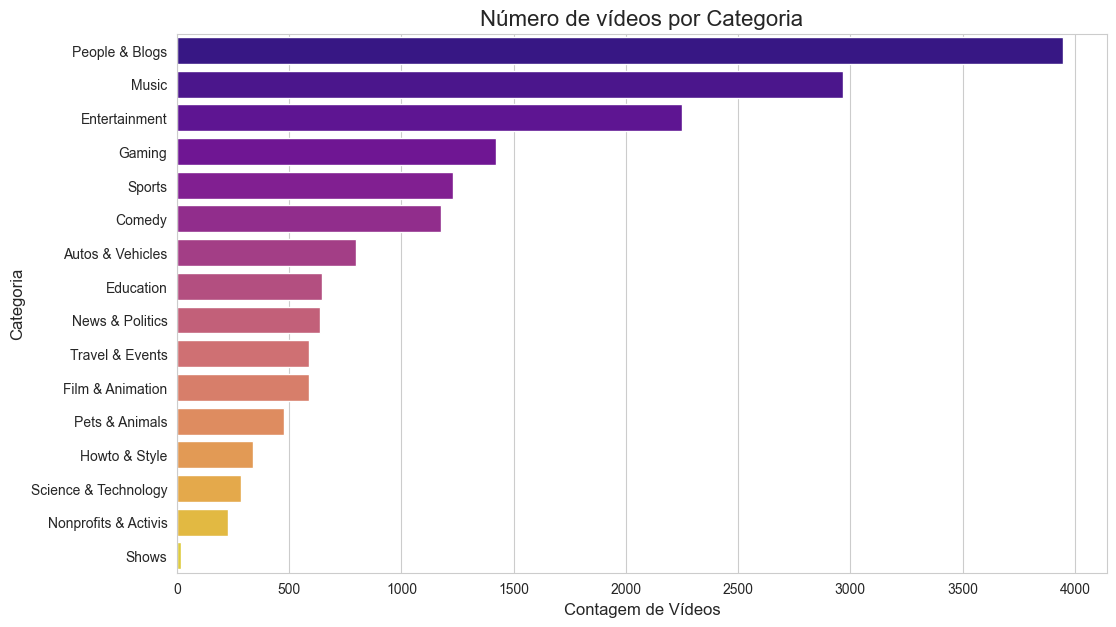

In [17]:
# GRÁFICO 2 : Qual a contagem de vídeos por categoria?
plt.figure(figsize=(12, 7))
sns.countplot(y='category',data=df, order=df['category'].value_counts().index, palette='plasma')
plt.title('Número de vídeos por Categoria', fontsize=16)
plt.xlabel('Contagem de Vídeos', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()

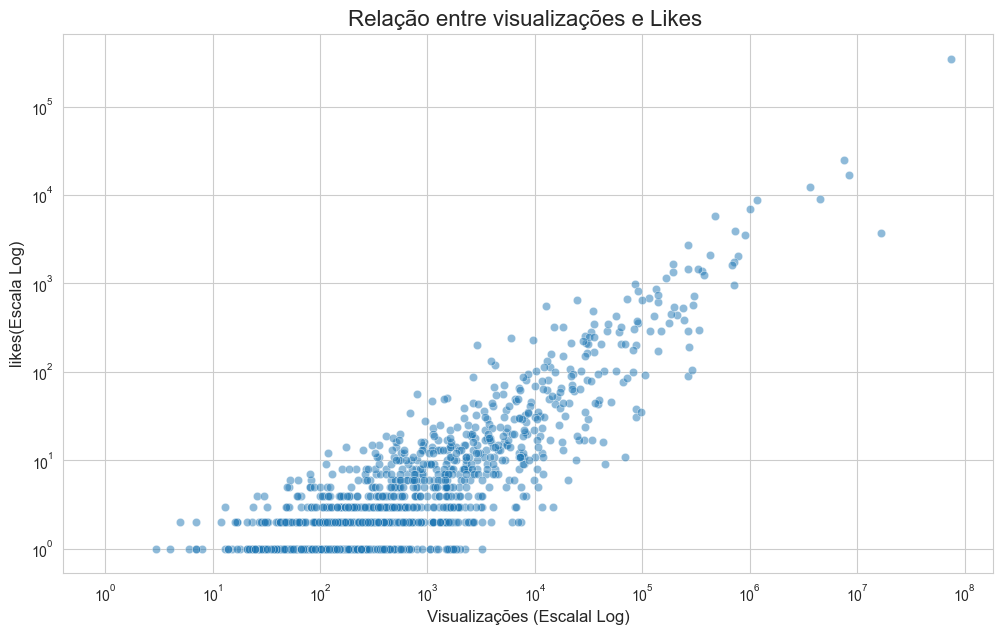

In [18]:
#célula 11(Versão corrigida e final)

#GRÁFICO 3 : Qual a relação entre Visuaizações e Likes ?
#Usamos um gráfico de dispersão(scatterplot) para ver a correlação.

plt.figure(figsize=(12, 7))

#Usamos uma amostra de até 2000 pontos para o gráfico não ficar muito  pesado
# e os nomes das colunas em minúsculo('views','likes')

sample_size = min(2000, len(df))
sns.scatterplot(data=df. sample(sample_size), x= 'views', y= 'likes', alpha= 0.5)
plt.title('Relação entre visualizações e Likes ', fontsize=16)
plt.xlabel('Visualizações (Escalal Log)', fontsize=12)
plt.ylabel('likes(Escala Log)', fontsize=12)

#Colocamos os eixos em escala logarítmica para visualizar melhor a concentração de pontos
plt.xscale('log')
plt.yscale('log')
plt.show()